<a href="https://colab.research.google.com/github/Gnanadeepa05/INFO-5731/blob/main/Paladugu_Gnana_Deepa_In_class_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.


> Add blockquote


**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


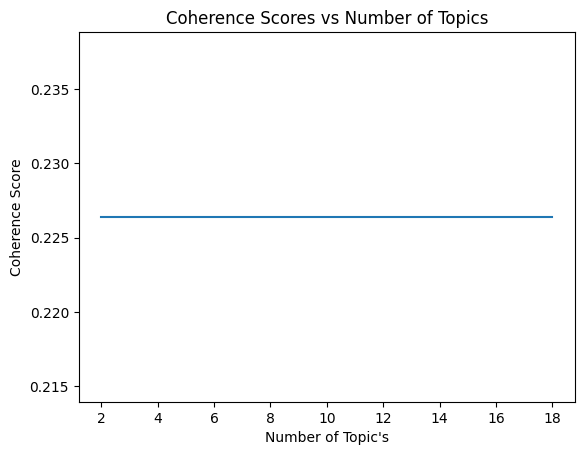

Optimal number of topics: 14
Best Coherence Score: 0.2263986213307429
Topic 1: 0.630*"story" + 0.210*"character" + 0.074*"know" + 0.056*"love" + 0.004*"great" + 0.004*"series" + 0.004*"reading" + 0.004*"read" + 0.004*"time" + 0.004*"like"
Topic 2: 0.442*"read" + 0.268*"story" + 0.163*"love" + 0.048*"great" + 0.046*"reading" + 0.007*"character" + 0.005*"life" + 0.005*"know" + 0.004*"time" + 0.004*"good"
Topic 3: 0.289*"great" + 0.279*"series" + 0.184*"character" + 0.154*"like" + 0.068*"read" + 0.004*"good" + 0.004*"love" + 0.004*"know" + 0.004*"story" + 0.004*"time"
Topic 4: 0.354*"love" + 0.226*"story" + 0.173*"read" + 0.116*"time" + 0.070*"life" + 0.027*"great" + 0.025*"reading" + 0.003*"series" + 0.002*"like" + 0.002*"character"
Topic 5: 0.601*"time" + 0.142*"story" + 0.083*"great" + 0.068*"love" + 0.043*"series" + 0.022*"read" + 0.021*"like" + 0.004*"life" + 0.004*"reading" + 0.004*"know"
Topic 6: 0.302*"character" + 0.285*"series" + 0.210*"love" + 0.065*"time" + 0.059*"read" + 0.04

In [ ]:
#importing librarires
import pandas as pd
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt

#stoploss
nltk.download('wordnet')
nltk.download('stopwords')

# load the dataset
df = pd.read_csv('products.csv')
texts = df['review_body'].dropna().tolist()

# lemmetizer
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

# preprocessing
def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS and len(token) > 3:
            result.append(lemmatizer.lemmatize(token))
    return result

processed_texts = [preprocess(text) for text in texts]

# creating lda
dictionary = gensim.corpora.Dictionary(processed_texts)
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(text) for text in processed_texts]

# finding coherence val's
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=100,
                         update_every=1,
                         chunksize=100,
                         passes=10,
                         alpha='auto',
                         per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

#params
limit = 20
start = 2
step = 2

# computing coherence
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_texts, start=start, limit=limit, step=step)

#Plot
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topic's")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores vs Number of Topics")
plt.show()

best_model_idx = coherence_values.index(max(coherence_values))
best_lda_model = model_list[best_model_idx]

#printing optimal no of topics
optimal_topics = start + best_model_idx * step
print(f"Optimal number of topics: {optimal_topics}")
print(f"Best Coherence Score: {max(coherence_values)}")

topics = best_lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic {idx + 1}: {topic}")


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


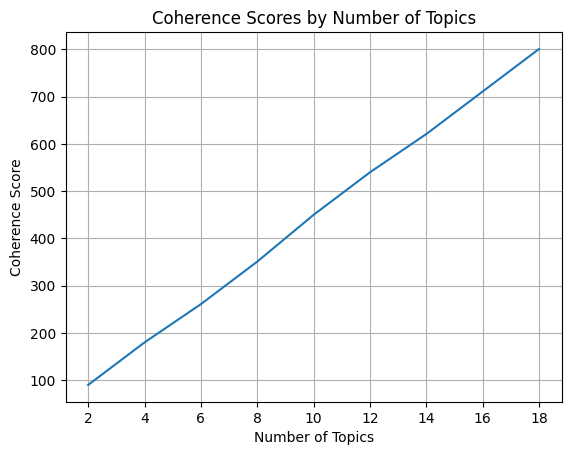

Optimal number of topics  are 18
Best Coherence Score is  801.0
Topic 1: book, read, series, great, character, really, story, love, like, could
Topic 2: series, great, next, character, read, development, fantasy, wait, could, impact
Topic 3: book, next, wait, enjoyed, author, series, looking, forward, unable, written
Topic 4: really, good, read, enjoyed, clean, thanks, like, felt, liked, interesting
Topic 5: loved, read, author, absolutely, far, want, probably, work, best, third
Topic 6: good, work, character, series, clean, first, tell, soon, would, line
Topic 7: love, work, thanks, clean, change, absolutely, better, read, forward, deal
Topic 8: really, want, like, read, know, liked, finished, felt, laugh, even
Topic 9: loved, really, enjoyed, story, always, child, book, like, work, fantasy
Topic 10: character, good, book, guess, interesting, love, life, even, written, finishing
Topic 11: work, short, loved, next, reading, love, forward, could, excellent, people
Topic 12: little, book

In [ ]:
# import
import pandas as pd
import nltk
import gensim
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# loading ds
df = pd.read_csv('products.csv')
texts = df['review_body'].dropna().tolist()

#lemmetizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

#preprocess
def preprocess(text):
    result = []
    for token in nltk.word_tokenize(text.lower()):
        if token not in stop_words and len(token) > 3:
            result.append(lemmatizer.lemmatize(token))
    return ' '.join(result)

processed_texts = [preprocess(text) for text in texts]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_texts)

def compute_coherence_values(tfidf_matrix, texts, limit, start=2, step=2):
    coherence_values = []
    svd_models = []
    #gensim dict
    dictionary = gensim.corpora.Dictionary([text.split() for text in texts])

    for num_topics in range(start, limit, step):
        svd_model = TruncatedSVD(n_components=num_topics, random_state=42)
        topic_matrix = svd_model.fit_transform(tfidf_matrix)
        terms = vectorizer.get_feature_names_out()
        top_terms = []
        for topic_idx in range(num_topics):
            terms_idx = np.argsort(svd_model.components_[topic_idx])[::-1][:10]
            top_terms.append([terms[i] for i in terms_idx])

        coherence_score = 0.0
        for terms in top_terms:
            score = 0.0
            for i in range(len(terms)):
                for j in range(i + 1, len(terms)):
                    if terms[i] in dictionary.token2id and terms[j] in dictionary.token2id:
                        score += 1
            coherence_score += score

        coherence_values.append(coherence_score)
        svd_models.append(svd_model)

    return svd_models, coherence_values

# set parameters
limit = 20
start = 2
step = 2
svd_models, coherence_values = compute_coherence_values(tfidf_matrix, processed_texts, limit, start, step)

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores by Number of Topics")
plt.xticks(x)
plt.grid()
plt.show()

best_model_idx = coherence_values.index(max(coherence_values))
best_lsa_model = svd_models[best_model_idx]
optimal_topics = start + best_model_idx * step
print(f"Optimal number of topics  are {optimal_topics}")
print(f"Best Coherence Score is  {max(coherence_values)}")

terms = vectorizer.get_feature_names_out()
topic_keywords = {}

for i in range(optimal_topics):
    topic_terms = best_lsa_model.components_[i]
    top_terms_indices = topic_terms.argsort()[-10:][::-1]
    top_terms = [terms[j] for j in top_terms_indices]
    topic_keywords[f'Topic {i + 1}'] = top_terms

# printing the summarized topics
for topic, keywords in topic_keywords.items():
    print(f"{topic}: {', '.join(keywords)}")


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
import pandas as pd
from bertopic import BERTopic
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf

# loading the dataset
df = pd.read_csv("products.csv")

# cleaning body
df['review_body'] = df['review_body'].fillna('')
docs = df['review_body'].astype(str).tolist()

print(f"Number of documents: {len(docs)}")
print(f"Sample review: {docs[0][:100]}...")

# Intializing bert
topic_model = BERTopic(
    embedding_model="all-MiniLM-L6-v2",
    min_topic_size=2,
    verbose=True
)

try:
    # Fit the model
    topics, probabilities = topic_model.fit_transform(docs)

    print("\nTopic distribution:")
    print(pd.Series(topics).value_counts())

    if len(set(topics)) > 1:
        try:
            topic_visualization = topic_model.visualize_topics()
            barchart_visualization = topic_model.visualize_barchart()
            print("\nVisualizations created successfully")
        except Exception as e:
            print(f"\nError creating visualizations: {str(e)}")
    else:
        print("\nNot enough distinct topics found for visualization")

    # Print no of topics and summary
    n_topics = len(set(topics))
    print(f"\nNumber of topics found: {n_topics}")
    print("\nTopic summary:")
    for topic_id in sorted(set(topics)):
        topic_info = topic_model.get_topic(topic_id)
        if topic_info:
            topic_words = [word for word, weight in topic_info]
            print(f"Topic {topic_id}: {', '.join(topic_words)}")
        else:
            print(f"Topic {topic_id}: No words were found.")

    # coherence score
    topic_words = []
    for topic_id in sorted(set(topics)):
        topic_info = topic_model.get_topic(topic_id)
        if topic_info:
            words = [word for word, _ in topic_info[:10]]
            topic_words.append(words)
    tokenized_docs = [doc.split() for doc in docs]
    dictionary = Dictionary(tokenized_docs)

    # coherence score
    coherence_model = CoherenceModel(
        topics=topic_words,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_score = coherence_model.get_coherence()
    print(f"\nCoherence Score: {coherence_score:.4f}")
    df['topic'] = topics

    print("\nExample documents for each topic:")
    for topic_id in sorted(set(topics)):
        topic_docs = df[df['topic'] == topic_id]['review_body'].head(2).tolist()
        print(f"\nTopic {topic_id} examples:")
        for doc in topic_docs:
            print(f"- {doc[:100]}...")

    if len(set(topics)) > 2:
        try:
            hierarchical_topics = topic_model.hierarchical_topics(docs, topics)
            hierarchy_visualization = topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)
            print("\nHierarchy visualization created successfully")
        except Exception as e:
            print(f"\nError creating hierarchy visualization: {str(e)}")
    else:
        print("\nNot enough topics for hierarchy visualization")

except Exception as e:
    print(f"Error during topic modeling: {str(e)}")
    print("\nDebug information:")
    print(f"Data types in docs: {[type(doc) for doc in docs[:5]]}")
    print(f"Document lengths: {[len(str(doc)) for doc in docs[:5]]}")

2024-10-31 22:01:43,961 - BERTopic - Embedding - Transforming documents to embeddings.


Number of documents: 100
Sample review: "Elmore Leonard meets the cast of Sierra Madre. Just a quirky read that will make you want to keep t...


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2024-10-31 22:01:54,264 - BERTopic - Embedding - Completed ✓
2024-10-31 22:01:54,266 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-31 22:01:54,510 - BERTopic - Dimensionality - Completed ✓
2024-10-31 22:01:54,512 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-31 22:01:54,529 - BERTopic - Cluster - Completed ✓
2024-10-31 22:01:54,537 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-31 22:01:54,576 - BERTopic - Representation - Completed ✓



Topic distribution:
-1     21
 0     12
 1     10
 2      8
 3      8
 4      7
 5      6
 6      5
 7      5
 8      4
 9      4
 10     4
 11     3
 12     3
Name: count, dtype: int64

Visualizations created successfully

Number of topics found: 14

Topic summary:
Topic -1: the, this, to, and, it, book, br, of, in, story
Topic 0: it, read, couldn, characters, this, the, have, great, life, to
Topic 1: it, though, the, kept, enjoyed, was, me, of, books, felt
Topic 2: br, and, he, the, to, she, in, for, of, is
Topic 3: kindle, clean, this, 34, not, we, from, thanks, have, it
Topic 4: series, soon, you, the, next, this, will, read, book, and
Topic 5: and, br, on, the, bible, ideas, this, it, be, internet
Topic 6: that, to, nation, words, hear, understanding, important, founders, through, of
Topic 7: the, of, weapons, highly, its, interesting, in, to, fortunes, training
Topic 8: how, sheep, short, sleepy, tries, they, sisters, books, forward, and
Topic 9: loved, guess, and, book, it, dow

100%|██████████| 12/12 [00:00<00:00, 198.63it/s]


Hierarchy visualization created successfully


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
import numpy as np
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaMulticore
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset
df = pd.read_csv("products.csv")
docs = df['review_body'].dropna().tolist()  # Ensures only non-empty reviews are included

# Preprocess
docs = [doc.split() for doc in docs]
dictionary = corpora.Dictionary(docs)
corpus = [dictionary.doc2bow(text) for text in docs]

# training lda
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=10)



<Figure size 1200x800 with 0 Axes>

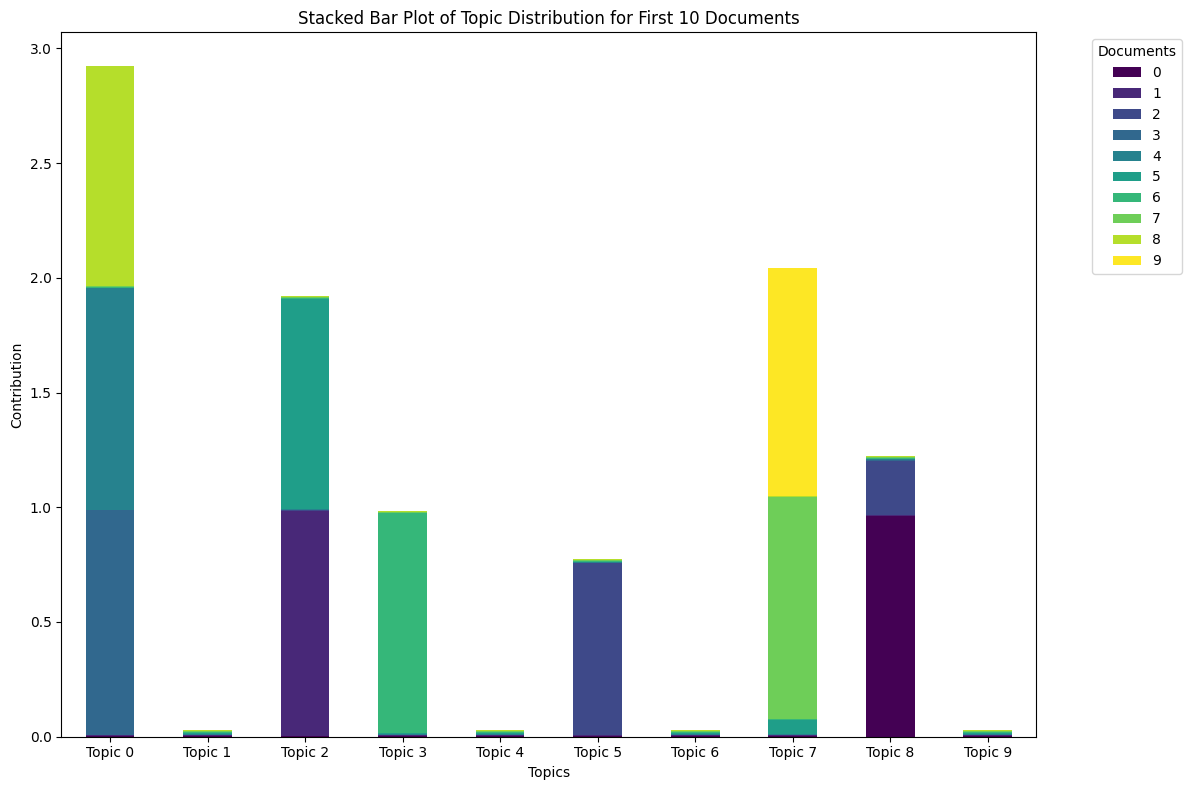

In [ ]:

plt.figure(figsize=(12, 8))
topic_df.iloc[:10].T.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')
plt.title("Stacked Bar Plot of Topic Distribution for First 10 Documents")
plt.xlabel("Topics")
plt.ylabel("Contribution")
plt.xticks(rotation=0)
plt.legend(title='Documents', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


 visualization 1: This is a set of bars that show the shares of each topic in the given set of documents, limited to, 10 documents. It demonstrates how all topics relate to each paper, giving some understanding of the topic split.

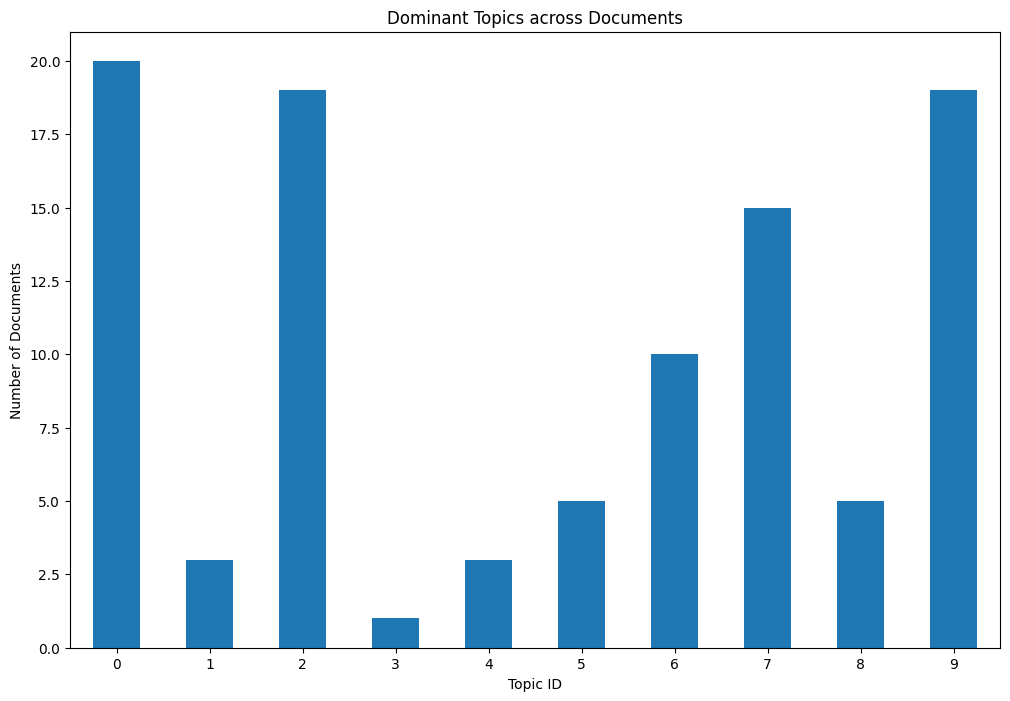

In [ ]:
doc_lda = [lda_model[corpus[i]] for i in range(len(corpus))]
doc_topics = np.array([max(doc, key=lambda item: item[1])[0] for doc in doc_lda])
doc_topic_df = pd.DataFrame({'Document': range(len(corpus)), 'Dominant Topic': doc_topics})
fig, ax = plt.subplots(figsize=(12, 8))
doc_topic_df['Dominant Topic'].value_counts().sort_index().plot(kind='bar', ax=ax)

plt.title('Dominant Topics across Documents')
plt.xlabel('Topic ID')
plt.ylabel('Number of Documents')
plt.xticks(rotation=0)
plt.show()



 visualization 2: topic distributions per document
 This bar chart represents the number of times the most dominant topics appear.
 Every bar corresponds to a topic while the height of the bar shows how many documents are associated.
 it gives suggestions on how frequent the topics are to assist in knowing most appropriate topics in the data collection.

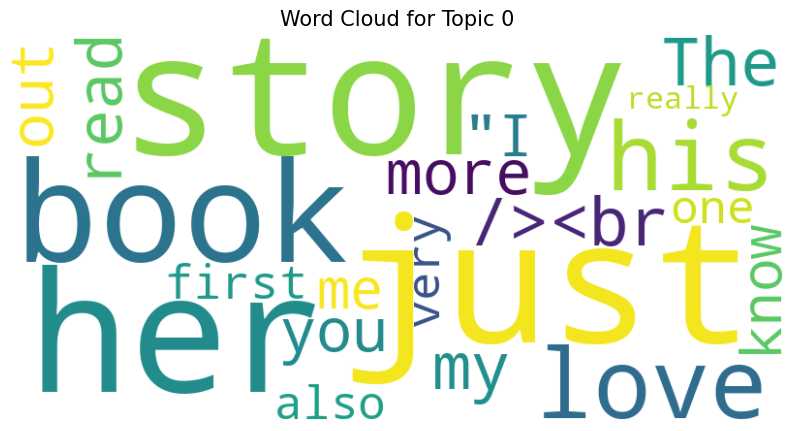

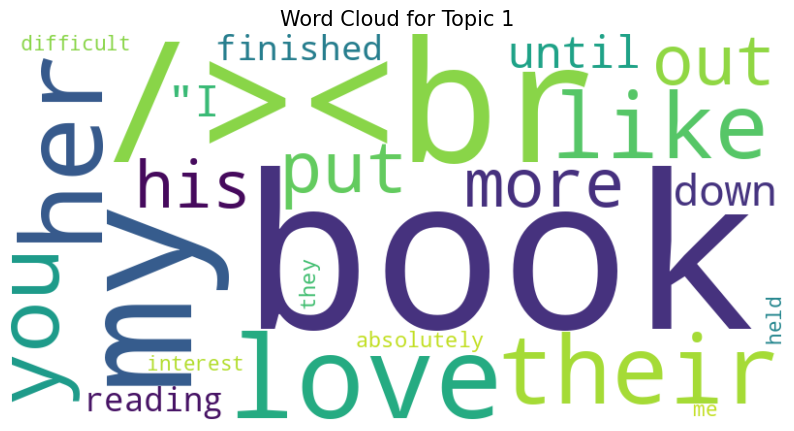

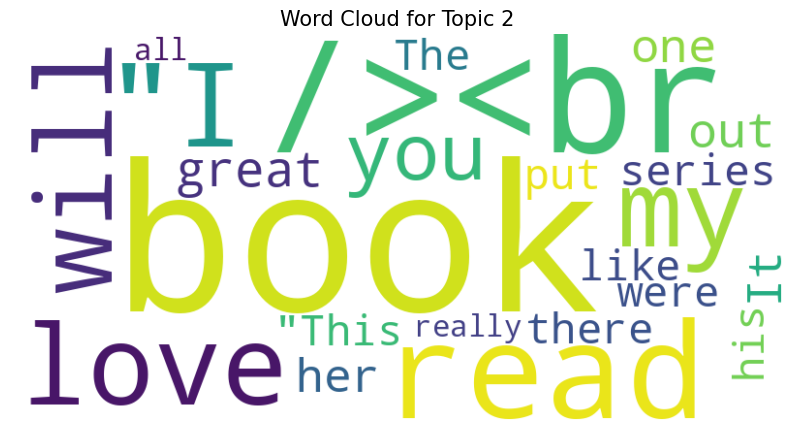

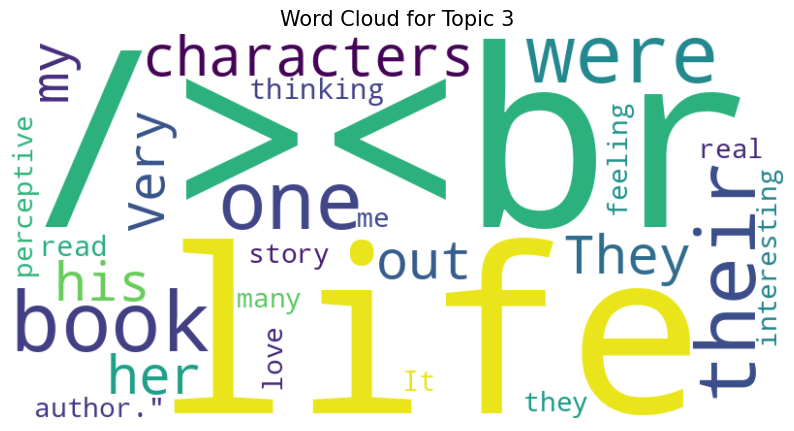

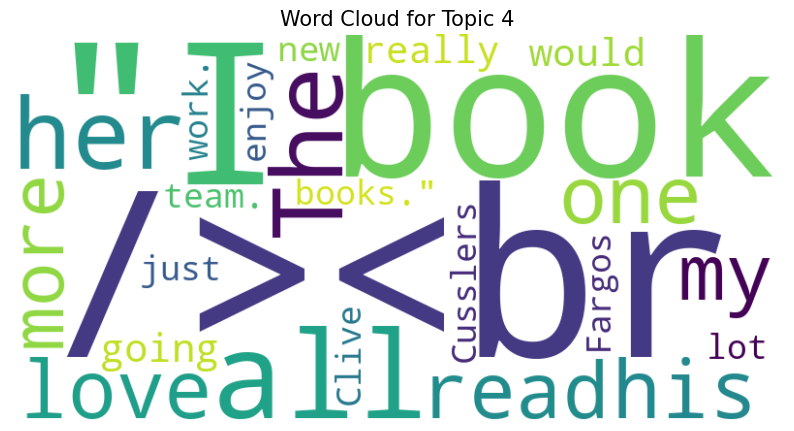

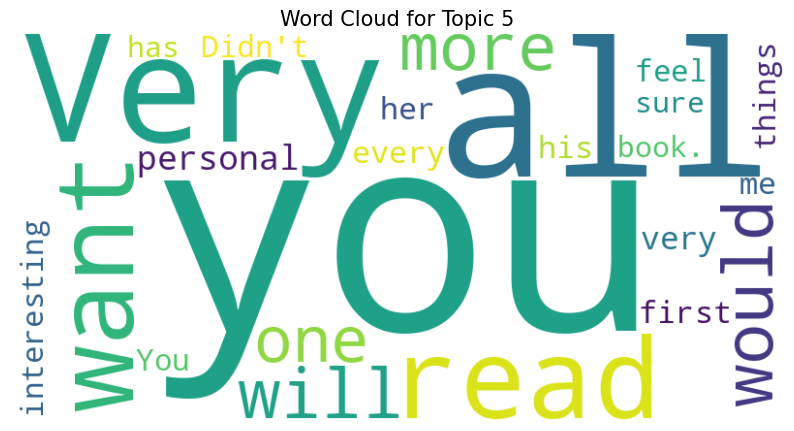

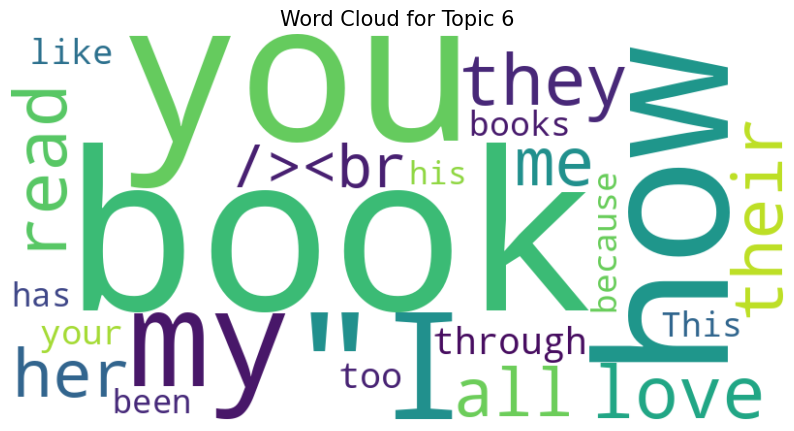

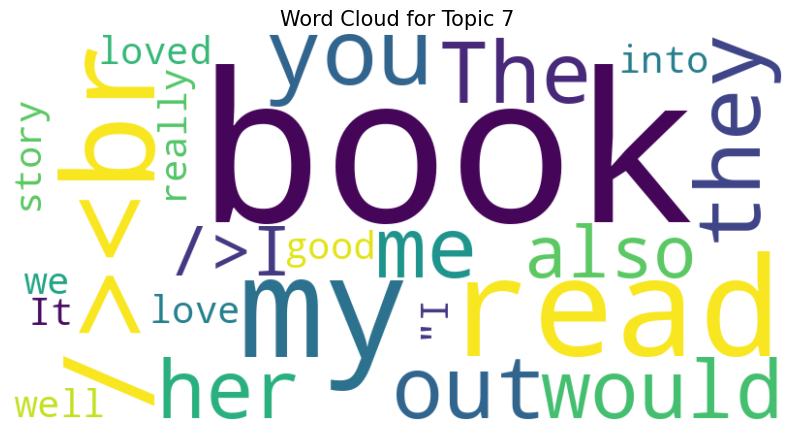

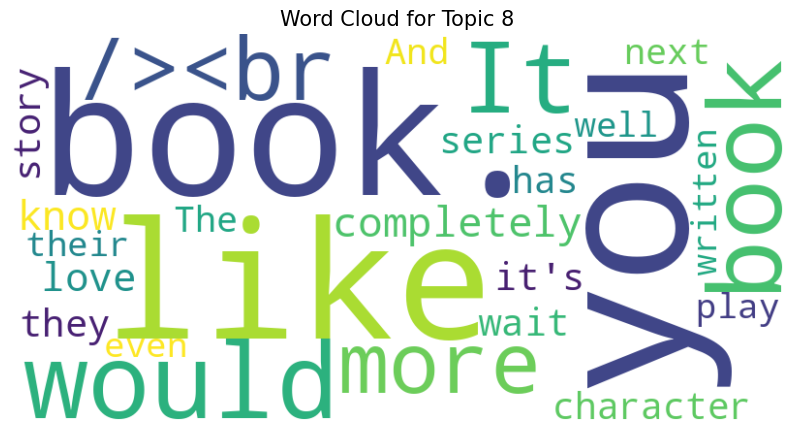

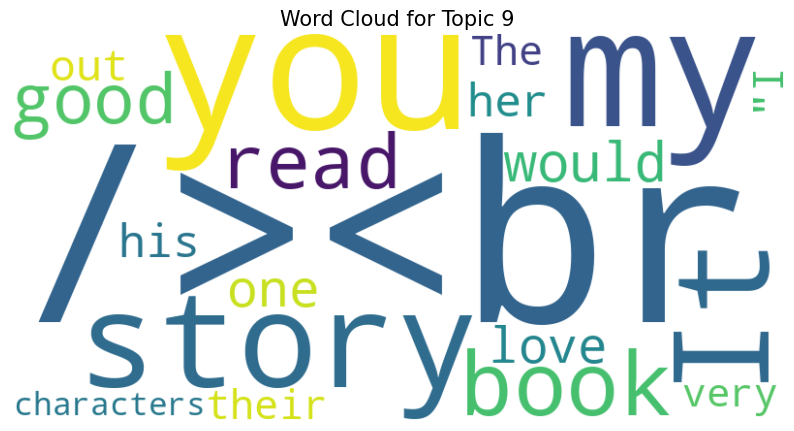

In [ ]:
stop_words = set(["is", "am", "the", "this", "was", "are", "a", "I","she","he","about","can","had","have","from","I", "an", "of", "in", "and", "to", "for", "on", "with", "by", "that", "it", "at", "as", "be", "but", "not", "or", "if", "which", "who", "whom", "so", "what", "when", "where", "why"])
for t in range(lda_model.num_topics):
    plt.figure(figsize=(10, 6))
    plt.title(f"Word Cloud for Topic {t}", fontsize=15)

    # Get the topic words and filter out stop words
    topic_words = dict(lda_model.show_topic(t, topn=50))
    filtered_topic_words = {word: freq for word, freq in topic_words.items() if word not in stop_words}

    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(filtered_topic_words)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


 Visualization 3: word cloud for each topic
 The word clouds visually represent important terms in each topic.
 Larger words will be more close to concept.
 This visualization enables easy comprehension of the main ideas linked with topic, so it will be easy to grasp importance of topics.
 List of stop words to ignore

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

The most important feature in BERTopic is the ability to use proper contextual embeddings, included but not limited to BERT, which would allow it to capture complex relations of words. This leads to topics that are mostly are coherent and meaningful making BERTopic very efficient if used on complex datasets. The other unique feature which makes it even more powerful is its ability to model topics over time meaning that where data is shifting, the model is able to capture these changes.

LDA, is one of the oldest and the most frequently used methods of clustering. This method gives clear interpretability and probabilistic framework for the topic generation and document-content relation. However, there are some limitations to this method, it may not easily recognize more subtle interconnection of semantic concepts, particularly if the data set is very large and complex.

Ida2Vec is an idiomatic analysis that combines the concepts of word embeddings with clustering for identifying semantic interaction between words. In particular, it performs fairly well in Highlighting multiple related topics within text and is capable of offering interpretable and coherent topics for the text. Compared to LDA and LSA Ida2Vec proved to be better for datasets containing comparatively lesser data as it augments the quality of topics.

Sometimes, LSA can be helpful for reducing dimensionality as well as for defining the hidden structures, however, it does not possess interpretability of LDA and contextual sense of BERTopic.

Thus, deciding on which kind of the algorithm is the best can be done solely taking into consideration the requirements for the individual project. However, for more interpretative application as well as those applications that call for well-defined topics LDA is still viable. Nonetheless, in precision-oriented tasks for more complicated data where these subtle relations play a role, BERTopic appears to be a better solution. Last of all, the comparison of the results by the amount of coherence, interpretability, and adaptability of the outcome serves as the final criterion for the selection of the most suitable topic modeling strategy.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



I learned topic modelling by solving this and gained a significant practical experience and i have improved my feauture extracting by implementing the algorithms and, i face challenges in bert and this assignment is highly relevant to my studies and this helps to gains insights from large text datasets.